### Appendix A.2: Shape Smoothing Using the Estimated Covariance Surface

In [1]:
devtools::install("../../elasticproc2d", quiet=TRUE, quick=TRUE)

In [2]:
library(dplyr)
library(viridis)
library(RColorBrewer)
library(ggplot2)
library(gridExtra)
library(tidyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: viridisLite


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [3]:
library(elasticproc2d)
source("../scripts/load_datasets.R")
set.seed(18)
test_curves <- curves.spiral(n_curves = 10, rotate=FALSE, scale=FALSE, center=TRUE)
set.seed(18)
data_curves2 <- curves.spiral(n_curves = 10, rotate=TRUE, scale=TRUE, center=FALSE)
data_curves1 <- curves.digit3(rotate=TRUE, scale=TRUE, center=FALSE)
knots1 <- seq(0, 1, length = 13)
knots2 <- seq(0, 1, length = 13)

In [4]:
mean3 <- compute_elastic_proc2d_mean(data_curves1, knots1, "smooth", penalty=2, pfit_method="smooth")
mean4 <- compute_elastic_proc2d_mean(data_curves2, knots2, "smooth", penalty=2, pfit_method="smooth")

Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis

In [5]:
palette <- brewer.pal(6, "Paired")

In [6]:
theme_thesis <- function(){ 
    theme_bw() %+replace%    #replace elements we want to change
    theme()
}

# Display plots in smaller size
options(repr.plot.width=10, repr.plot.height=6)

In [10]:
pfit.spirals <- lapply(seq_along(mean4$data_curves), function(j){
    curve <- get_procrustes_fit(mean4$data_curves[[j]])
    curve <- center_curve(curve)
    curve$t <- mean4$data_curves[[j]]$t_optim
    curve
})

pfit.digits <- lapply(seq_along(mean3$data_curves), function(j){
    curve <- get_procrustes_fit(mean3$data_curves[[j]])
    curve <- center_curve(curve)
    curve$t <- mean3$data_curves[[j]]$t_optim
    curve
})

png 
  2

png 
  2

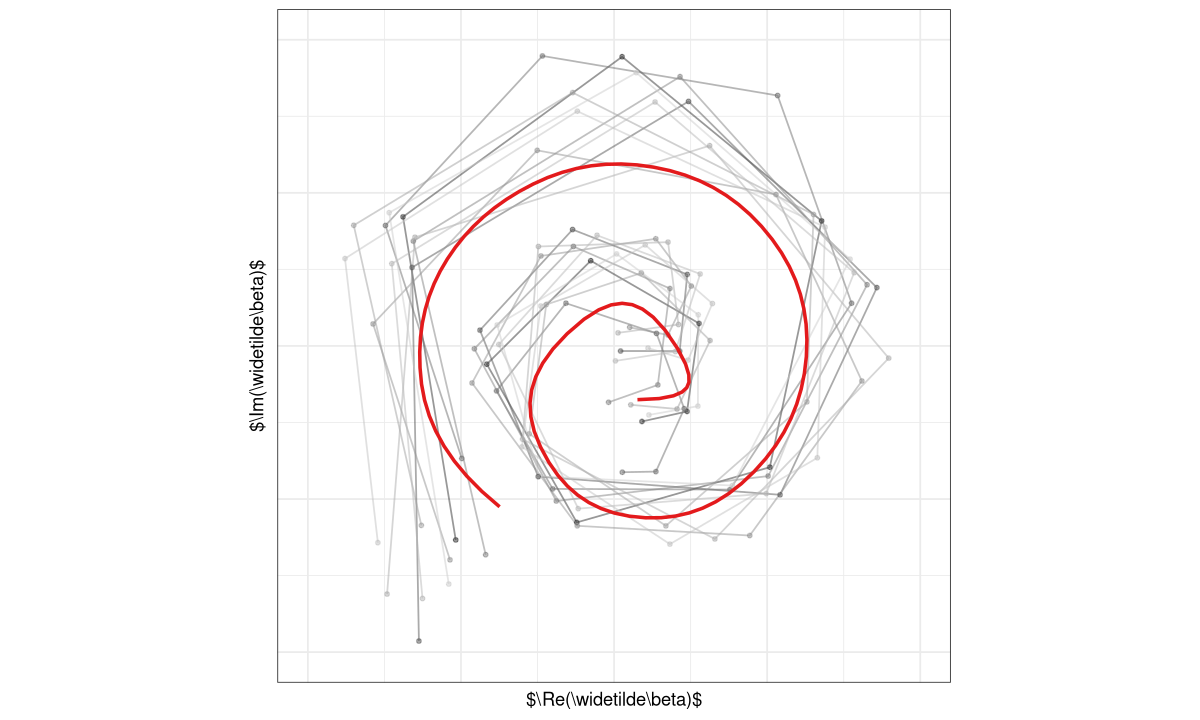

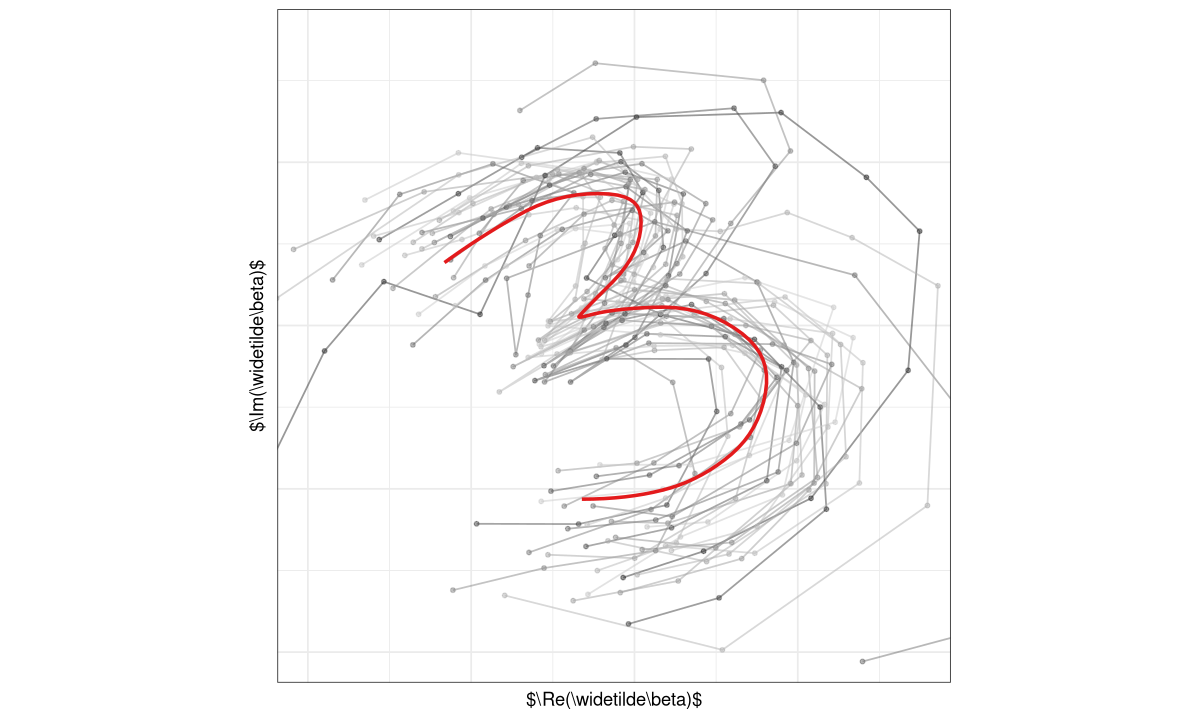

In [11]:
p.digits <- ggplot() + 
    geom_path(data=bind_rows(pfit.digits, .id="id"), size=0.5, alpha=0.5, aes(x=X1, y=X2, group=id, color=id), show.legend=FALSE) +
    geom_point(data=bind_rows(pfit.digits, .id="id"), size=1, alpha=0.5, aes(x=X1, y=X2, group=id, color=id), show.legend=FALSE) +
    geom_path(data=get_evals(mean3), aes(x=X1, y=X2), size=1, color=palette[6]) +
    scale_color_grey() +
    coord_fixed(xlim=c(-0.40,0.35), ylim=c(-0.40,0.35)) +
    labs(x = "$\\Re(\\widetilde\\beta)$", y = "$\\Im(\\widetilde\\beta)$") +
    theme_thesis() +
    theme(axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),
          axis.text.x = element_blank(), axis.text.y = element_blank())

p.spirals <- ggplot() + 
    geom_path(data=bind_rows(pfit.spirals, .id="id"), size=0.5, alpha=0.5, aes(x=X1, y=X2, group=id, color=id), show.legend=FALSE) +
    geom_point(data=bind_rows(pfit.spirals, .id="id"), size=1, alpha=0.5, aes(x=X1, y=X2, group=id, color=id), show.legend=FALSE) +
    geom_path(data=get_evals(mean4), aes(x=X1, y=X2), size=1, color=palette[6]) +
    scale_color_grey() +
    coord_fixed(xlim=c(-0.20,0.20), ylim=c(-0.20,0.20)) +
    labs(x = "$\\Re(\\widetilde\\beta)$", y = "$\\Im(\\widetilde\\beta)$") +
    theme_thesis() +
    theme(axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),
          axis.text.x = element_blank(), axis.text.y = element_blank())

fname = "../tex/graphics/A-smooth-sp.tex"
tikzDevice::tikz(file = fname, width = 2.5, height = 2.5)
p.spirals
dev.off()
p.spirals
lines <- readLines(con=fname)
lines <- lines[-which(grepl("\\path\\[clip\\]*", lines,perl=F))]
lines <- lines[-which(grepl("\\path\\[use as bounding box*", lines,perl=F))]
writeLines(lines,con=fname)

fname = "../tex/graphics/A-smooth-d3.tex"
tikzDevice::tikz(file = fname, width = 2.5, height = 2.5)
p.digits
dev.off()
p.digits
lines <- readLines(con=fname)
lines <- lines[-which(grepl("\\path\\[clip\\]*", lines,perl=F))]
lines <- lines[-which(grepl("\\path\\[use as bounding box*", lines,perl=F))]
writeLines(lines,con=fname)

In [12]:
pfits.smooth <- lapply(seq_along(mean3$data_curves), function(j){
  knots <- mean3$knots
  type <- mean3$type
  t <- seq(0, 1, by=0.01)
  srv.compl <- elasticproc2d:::make_design(t, knots, type) %*% mean3$fit$pfit_coefs[[j]]
  srv <- data.frame("t" = t, "X1" = Re(srv.compl), "X2" = Im(srv.compl))
  curve <- elasdics::get_points_from_srv(srv)
  center_curve(curve)
})[seq(1,10)]

pfits <- lapply(seq_along(mean3$data_curves), function(j){
    center_curve(mean3$data_curves[[j]])/elasticproc2d:::get_polygon_length(data_curves1[[j]])
})[seq(1,10)]


pfits.smooth2 <- lapply(seq_along(mean4$data_curves), function(j){
  knots <- mean4$knots
  type <- mean4$type
  t <- seq(0, 1, by=0.01)
  srv.compl <- elasticproc2d:::make_design(t, knots, type) %*% mean4$fit$pfit_coefs[[j]]
  srv <- data.frame("t" = t, "X1" = Re(srv.compl), "X2" = Im(srv.compl))
  curve <- elasdics::get_points_from_srv(srv)
  center_curve(curve)
})

pfits2 <- lapply(seq_along(mean4$data_curves), function(j){
    center_curve(mean4$data_curves[[j]])/elasticproc2d:::get_polygon_length(data_curves2[[j]])
})

png 
  2

png 
  2

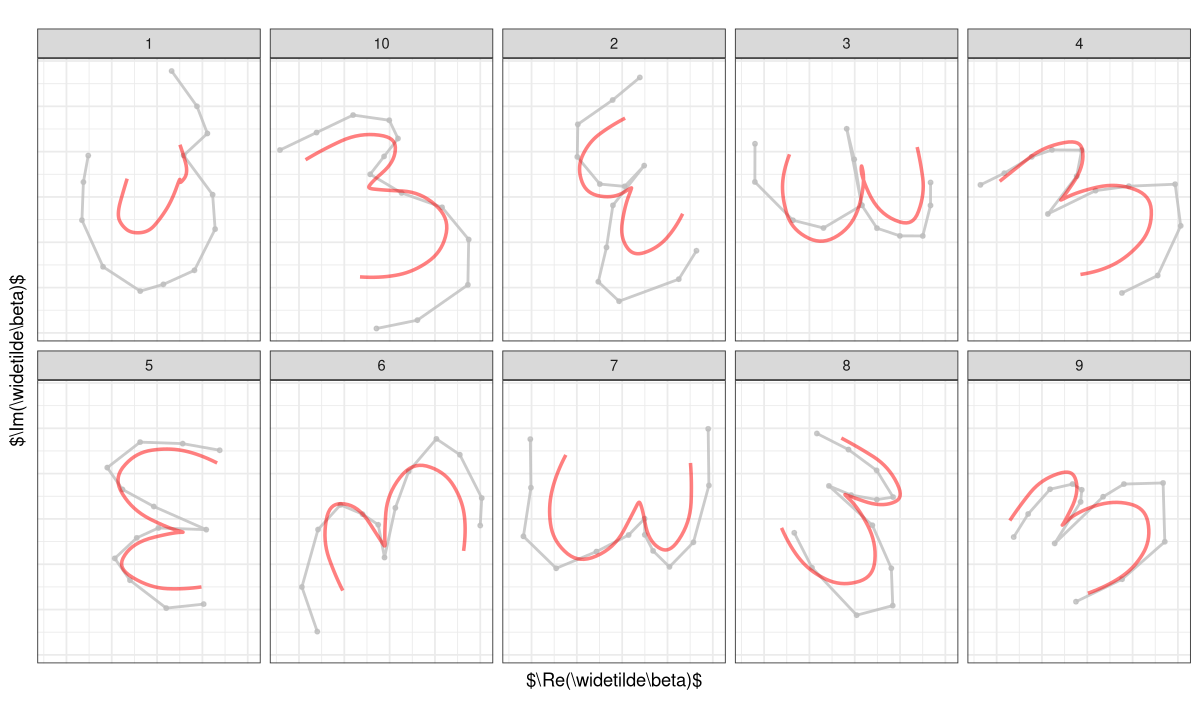

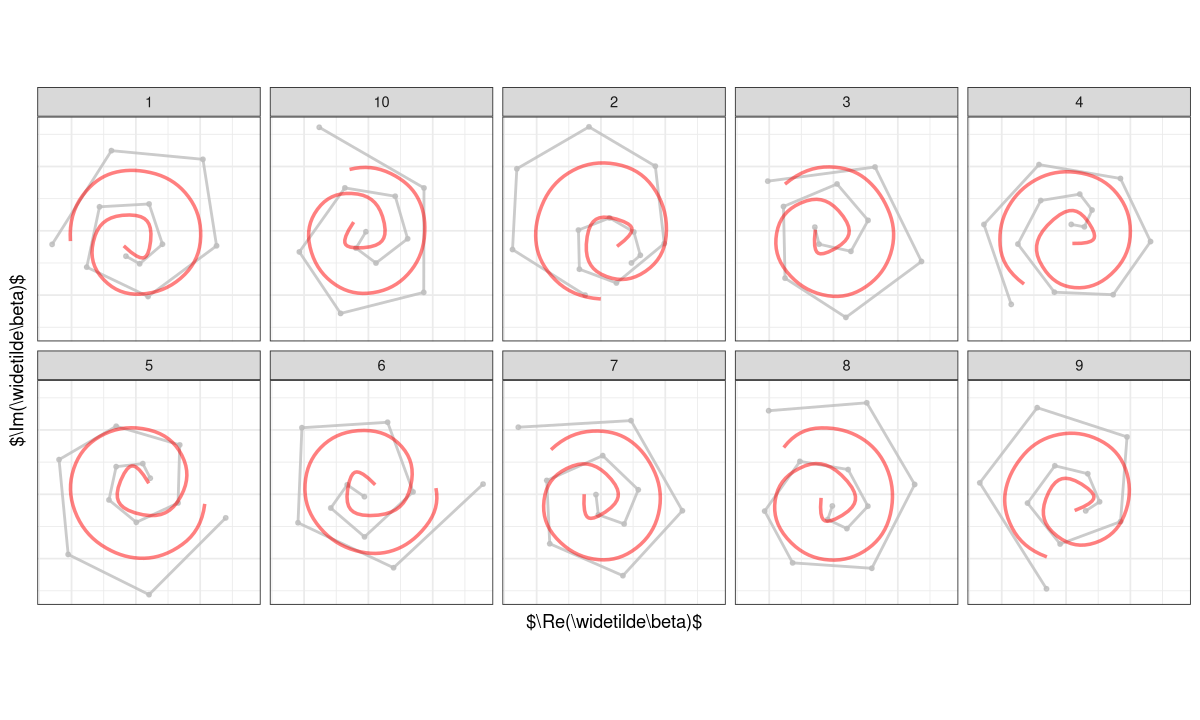

In [13]:
p.pfits1 <- ggplot(bind_rows(pfits.smooth, .id="id"), aes(x=X1, y=X2)) + 
    geom_path(data=bind_rows(pfits, .id="id"), aes(x=X1, y=X2, group=id), size = 0.8, color="grey", alpha=0.8) +
    geom_point(data=bind_rows(pfits, .id="id"), aes(x=X1, y=X2, group=id), color="grey", size=1, alpha=0.8) +
    geom_path(aes(group=id), size = 1, color="red", alpha=0.5) +
    coord_fixed() +
    labs(x = "$\\Re(\\widetilde\\beta)$", y = "$\\Im(\\widetilde\\beta)$") +
    theme_thesis() +
    theme(axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),
          axis.text.x = element_blank(), axis.text.y = element_blank()) +
    facet_wrap(~id, ncol=5)

p.pfits2 <- ggplot(bind_rows(pfits.smooth2, .id="id"), aes(x=X1, y=X2)) + 
    geom_path(data=bind_rows(pfits2, .id="id"), aes(x=X1, y=X2, group=id), size = 0.8, color="grey", alpha=0.8) +
    geom_point(data=bind_rows(pfits2, .id="id"), aes(x=X1, y=X2, group=id), color="grey", size=1, alpha=0.8) +
    geom_path(aes(group=id), size = 1, color="red", alpha=0.5) +
    coord_fixed() +
    labs(x = "$\\Re(\\widetilde\\beta)$", y = "$\\Im(\\widetilde\\beta)$") +
    theme_thesis() +
    theme(axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),
          axis.text.x = element_blank(), axis.text.y = element_blank()) +
    facet_wrap(~id, ncol=5)


fname = "../tex/graphics/A-smooth-pfits-sp.tex"
tikzDevice::tikz(file = fname, width = 6, height = 2.5)
p.pfits1
dev.off()
p.pfits1
lines <- readLines(con=fname)
lines <- lines[-which(grepl("\\path\\[clip\\]*", lines,perl=F))]
lines <- lines[-which(grepl("\\path\\[use as bounding box*", lines,perl=F))]
writeLines(lines,con=fname)

fname = "../tex/graphics/A-smooth-pfits-d3.tex"
tikzDevice::tikz(file = fname, width = 6, height = 2.5)
p.pfits2
dev.off()
p.pfits2
lines <- readLines(con=fname)
lines <- lines[-which(grepl("\\path\\[clip\\]*", lines,perl=F))]
lines <- lines[-which(grepl("\\path\\[use as bounding box*", lines,perl=F))]
writeLines(lines,con=fname)

#### With $\lambda = 0.4$ and ```penalty = 2``` :

In [14]:
mean7 <- compute_elastic_proc2d_mean(data_curves1, knots = knots1, type = "smooth", penalty = 2, pfit_method = "smooth", pfit_pen_factor = 0.4)
mean8 <- compute_elastic_proc2d_mean(data_curves2, knots = knots2, type = "smooth", penalty = 2, pfit_method = "smooth", pfit_pen_factor = 0.4)

Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis

In [15]:
pfit.spirals <- lapply(seq_along(mean8$data_curves), function(j){
    curve <- get_procrustes_fit(mean8$data_curves[[j]])
    curve <- center_curve(curve)
    curve$t <- mean8$data_curves[[j]]$t_optim
    curve
})

pfit.digits <- lapply(seq_along(mean7$data_curves), function(j){
    curve <- get_procrustes_fit(mean7$data_curves[[j]])
    curve <- center_curve(curve)
    curve$t <- mean7$data_curves[[j]]$t_optim
    curve
})

png 
  2

png 
  2

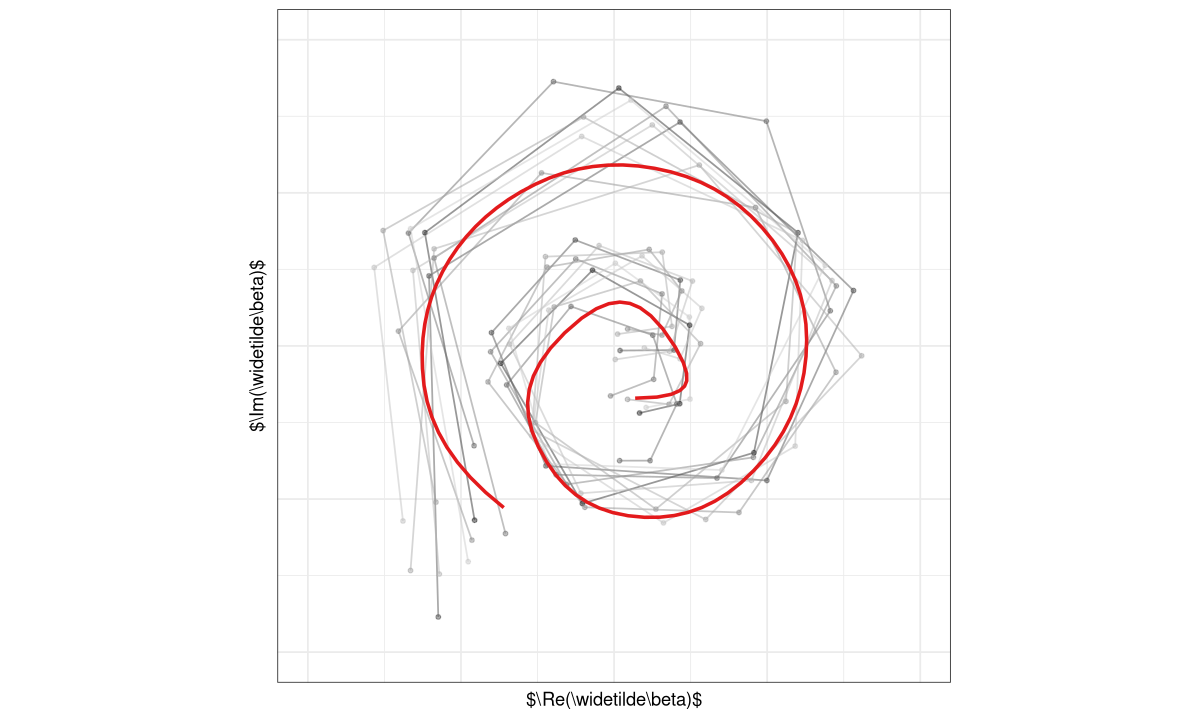

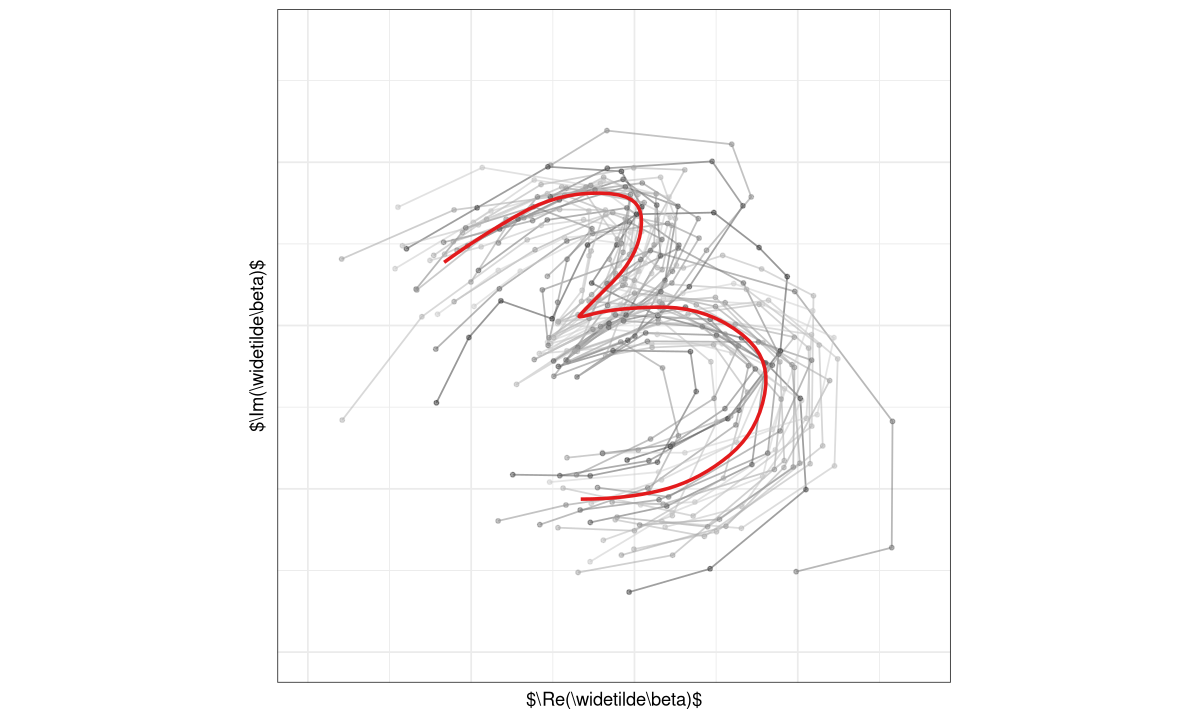

In [16]:
p.digits.lamb <- ggplot() + 
    geom_path(data=bind_rows(pfit.digits, .id="id"), size=0.5, alpha=0.5, aes(x=X1, y=X2, group=id, color=id), show.legend=FALSE) +
    geom_point(data=bind_rows(pfit.digits, .id="id"), size=1, alpha=0.5, aes(x=X1, y=X2, group=id, color=id), show.legend=FALSE) +
    geom_path(data=get_evals(mean7), aes(x=X1, y=X2), size=1, color=palette[6]) +
    scale_color_grey() +
    coord_fixed(xlim=c(-0.40,0.35), ylim=c(-0.40,0.35)) +
    labs(x = "$\\Re(\\widetilde\\beta)$", y = "$\\Im(\\widetilde\\beta)$") +
    theme_thesis() +
    theme(axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),
          axis.text.x = element_blank(), axis.text.y = element_blank())

p.spirals.lamb <- ggplot() + 
    geom_path(data=bind_rows(pfit.spirals, .id="id"), size=0.5, alpha=0.5, aes(x=X1, y=X2, group=id, color=id), show.legend=FALSE) +
    geom_point(data=bind_rows(pfit.spirals, .id="id"), size=1, alpha=0.5, aes(x=X1, y=X2, group=id, color=id), show.legend=FALSE) +
    geom_path(data=get_evals(mean8), aes(x=X1, y=X2), size=1, color=palette[6]) +
    scale_color_grey() +
    coord_fixed(xlim=c(-0.20,0.20), ylim=c(-0.20,0.20)) +
    labs(x = "$\\Re(\\widetilde\\beta)$", y = "$\\Im(\\widetilde\\beta)$") +
    theme_thesis() +
    theme(axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),
          axis.text.x = element_blank(), axis.text.y = element_blank())


fname = "../tex/graphics/A-smooth-sp-lamb.tex"
tikzDevice::tikz(file = fname, width = 6, height = 2.5)
p.spirals.lamb
dev.off()
p.spirals.lamb
lines <- readLines(con=fname)
lines <- lines[-which(grepl("\\path\\[clip\\]*", lines,perl=F))]
lines <- lines[-which(grepl("\\path\\[use as bounding box*", lines,perl=F))]
writeLines(lines,con=fname)

fname = "../tex/graphics/A-smooth-d3-lamb.tex"
tikzDevice::tikz(file = fname, width = 6, height = 2.5)
p.digits.lamb
dev.off()
p.digits.lamb
lines <- readLines(con=fname)
lines <- lines[-which(grepl("\\path\\[clip\\]*", lines,perl=F))]
lines <- lines[-which(grepl("\\path\\[use as bounding box*", lines,perl=F))]
writeLines(lines,con=fname)

In [17]:
pfits.smooth <- lapply(seq_along(mean8$data_curves), function(j){
  knots <- mean8$knots
  type <- mean8$type
  t <- seq(0, 1, by=0.01)
  srv.compl <- elasticproc2d:::make_design(t, knots, type) %*% mean8$fit$pfit_coefs[[j]]
  srv <- data.frame("t" = t, "X1" = Re(srv.compl), "X2" = Im(srv.compl))
  curve <- elasdics::get_points_from_srv(srv)
  center_curve(curve)
})

pfits <- lapply(seq_along(mean8$data_curves), function(j){
    center_curve(mean8$data_curves[[j]])/elasticproc2d:::get_polygon_length(data_curves2[[j]])
})


pfits.smooth2 <- lapply(seq_along(mean7$data_curves), function(j){
  knots <- mean7$knots
  type <- mean7$type
  t <- seq(0, 1, by=0.01)
  srv.compl <- elasticproc2d:::make_design(t, knots, type) %*% mean7$fit$pfit_coefs[[j]]
  srv <- data.frame("t" = t, "X1" = Re(srv.compl), "X2" = Im(srv.compl))
  curve <- elasdics::get_points_from_srv(srv)
  center_curve(curve)
})[seq(1,10)]

pfits2 <- lapply(seq_along(mean7$data_curves), function(j){
    center_curve(mean7$data_curves[[j]])/elasticproc2d:::get_polygon_length(data_curves1[[j]])
})[seq(1,10)]

png 
  2

png 
  2

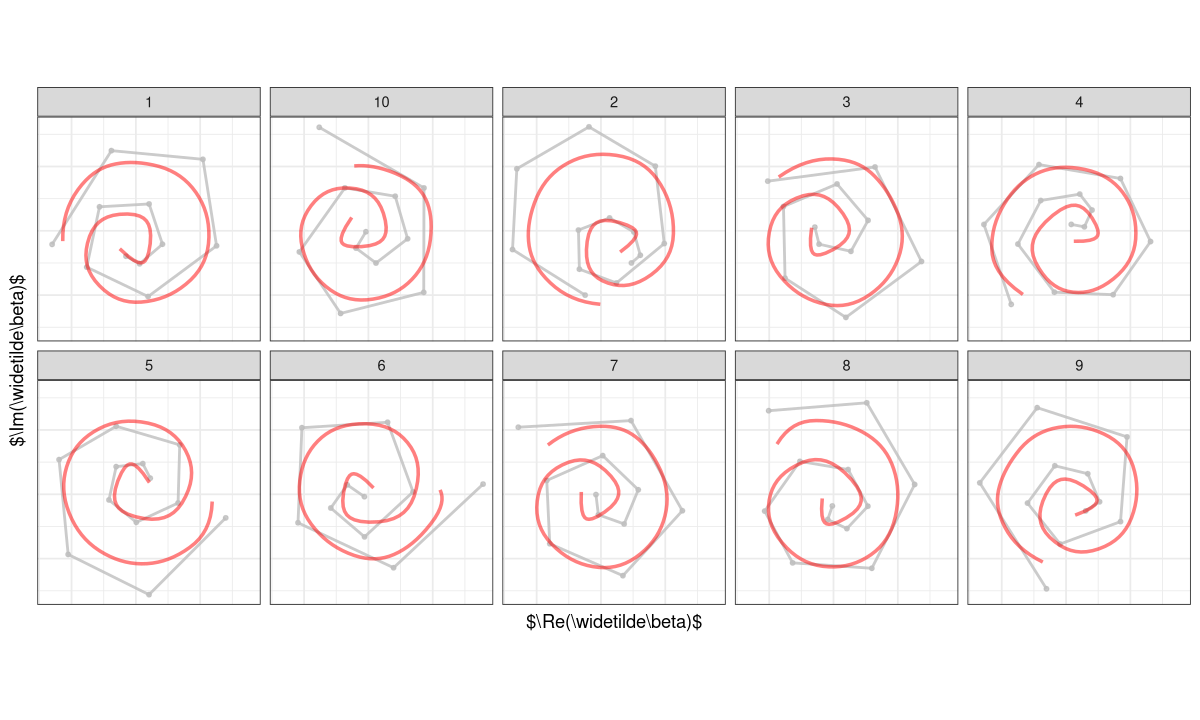

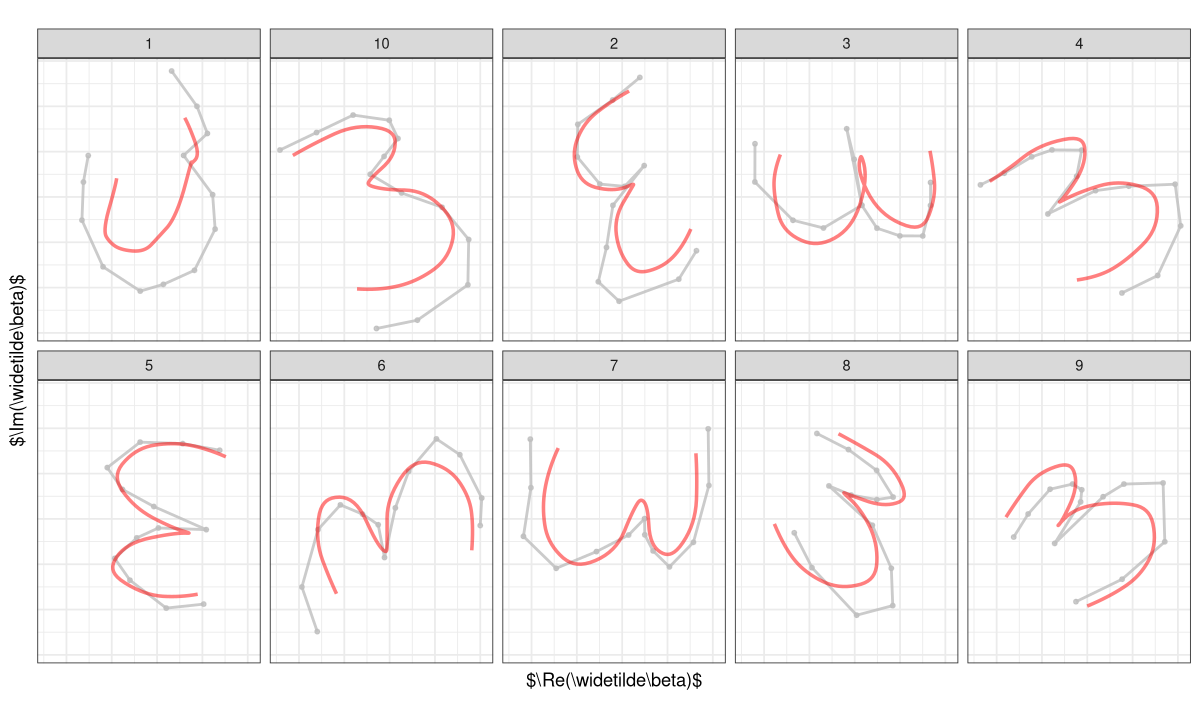

In [18]:
p.pfits1.lambd <- ggplot(bind_rows(pfits.smooth, .id="id"), aes(x=X1, y=X2)) + 
    geom_path(data=bind_rows(pfits, .id="id"), aes(x=X1, y=X2, group=id), size = 0.8, color="grey", alpha=0.8) +
    geom_point(data=bind_rows(pfits, .id="id"), aes(x=X1, y=X2, group=id), color="grey", size=1, alpha=0.8) +
    geom_path(aes(group=id), size = 1, color="red", alpha=0.5) +
    coord_fixed() +
    labs(x = "$\\Re(\\widetilde\\beta)$", y = "$\\Im(\\widetilde\\beta)$") +
    theme_thesis() +
    theme(axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),
          axis.text.x = element_blank(), axis.text.y = element_blank()) +
    facet_wrap(~id, ncol=5)

p.pfits2.lambd <- ggplot(bind_rows(pfits.smooth2, .id="id"), aes(x=X1, y=X2)) + 
    geom_path(data=bind_rows(pfits2, .id="id"), aes(x=X1, y=X2, group=id), size = 0.8, color="grey", alpha=0.8) +
    geom_point(data=bind_rows(pfits2, .id="id"), aes(x=X1, y=X2, group=id), color="grey", size=1, alpha=0.8) +
    geom_path(aes(group=id), size = 1, color="red", alpha=0.5) +
    coord_fixed() +
    labs(x = "$\\Re(\\widetilde\\beta)$", y = "$\\Im(\\widetilde\\beta)$") +
    theme_thesis() +
    theme(axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),
          axis.text.x = element_blank(), axis.text.y = element_blank()) +
    facet_wrap(~id, ncol=5)


fname = "../tex/graphics/A-smooth-pfits-sp-lamb.tex"
tikzDevice::tikz(file = fname, width = 6, height = 2.5)
p.pfits1.lambd
dev.off()
p.pfits1.lambd
lines <- readLines(con=fname)
lines <- lines[-which(grepl("\\path\\[clip\\]*", lines,perl=F))]
lines <- lines[-which(grepl("\\path\\[use as bounding box*", lines,perl=F))]
writeLines(lines,con=fname)

fname = "../tex/graphics/A-smooth-pfits-d3-lamb.tex"
tikzDevice::tikz(file = fname, width = 6, height = 2.5)
p.pfits2.lambd
dev.off()
p.pfits2.lambd
lines <- readLines(con=fname)
lines <- lines[-which(grepl("\\path\\[clip\\]*", lines,perl=F))]
lines <- lines[-which(grepl("\\path\\[use as bounding box*", lines,perl=F))]
writeLines(lines,con=fname)